# Toy data

__Objectives:__ 

- Create a template script for future analyses using a simple toy dataset.
- Enrich Catana functionality to enhance future analyses by factorising useful scripts into simple routines.
    - Develop visualisation functionality into Catana.
    - Develop an analysis workflow functionality into Catana.
    - Develop efficient and distributed algorithms for analysis in Catana.

### Note:
Ensure you activate CatAna `conda activate CatAna` prior to: `jupyter lab` to properly render Altair plots

In [1]:
import sys
sys.path.insert(1, r'R:\Projects\catana')

In [2]:
import altair as alt
import catana as ca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from catana.plotting.altchart import AltChart
from pandas.plotting import scatter_matrix

# 0 Setup

In [3]:
import numpy as np
np.random.seed(42)
random_state=42

from catana.analysis.transform import ndarray_to_df
from sklearn.datasets import samples_generator
X, y, truth_coef = samples_generator.make_regression(n_samples=1000, n_informative=2, n_features=3, noise=100, bias=30,
                                         n_targets=1, coef=True, random_state=42)


# Make the target a non-linear mapping of the features
y = np.exp((y + abs(y.min())) / 200)
#y = np.log1p(y)

df = ndarray_to_df(X, y)

n_bins = 4
df['y0_bin'] = pd.qcut(df['y0'], q=n_bins)  # Automatically binning and labeling by quantile
df['y0_bin'] = df['y0_bin'].apply(lambda x: '({:.1f}, {:.1f}]'.format(x.left, x.right))

In [4]:
print('True coefficients of model: {}'.format(truth_coef))

True coefficients of model: [98.35672065 81.87402295  0.        ]


# 1 Explore Data

- Characteristics of each attribute:
    - Name, type, missing data, noise, pdf type, descriptive power, target or feature
- Visualise
- Measure correlations between features

In [5]:
df

,x0,x1,x2,y0,y0_bin
0,0.633777,0.309821,0.413799,16.888075,"(10.5, 17.5]"
1,0.081829,0.838491,-0.098890,29.418234,"(17.5, 149.0]"
2,3.109919,1.995667,0.606723,148.967977,"(17.5, 149.0]"
3,1.476934,-1.516643,-1.167780,14.077299,"(10.5, 17.5]"
4,1.003533,-0.072010,0.361636,13.241229,"(10.5, 17.5]"
5,1.484116,0.472406,0.355613,24.221261,"(17.5, 149.0]"
6,1.487246,0.682052,-0.580053,23.029628,"(17.5, 149.0]"
7,-0.037037,-0.611769,-0.429302,24.733824,"(17.5, 149.0]"
8,-0.684630,1.007514,0.790626,11.998631,"(10.5, 17.5]"
9,2.075261,0.197600,-0.689188,28.559579,"(17.5, 149.0]"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
x0        1000 non-null float64
x1        1000 non-null float64
x2        1000 non-null float64
y0        1000 non-null float64
y0_bin    1000 non-null category
dtypes: category(1), float64(4)
memory usage: 32.5 KB


In [7]:
df.describe()

,x0,x1,x2,y0
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.005969,0.055011,0.046960,14.253786
std,1.008570,0.970212,0.981119,13.553945
min,-3.241267,-2.940389,-3.019512,1.000000
25%,-0.688545,-0.584350,-0.604172,6.158133
50%,-0.017285,0.056832,0.042202,10.485736
75%,0.670550,0.664346,0.679584,17.515380
max,3.193108,3.926238,3.852731,148.967977


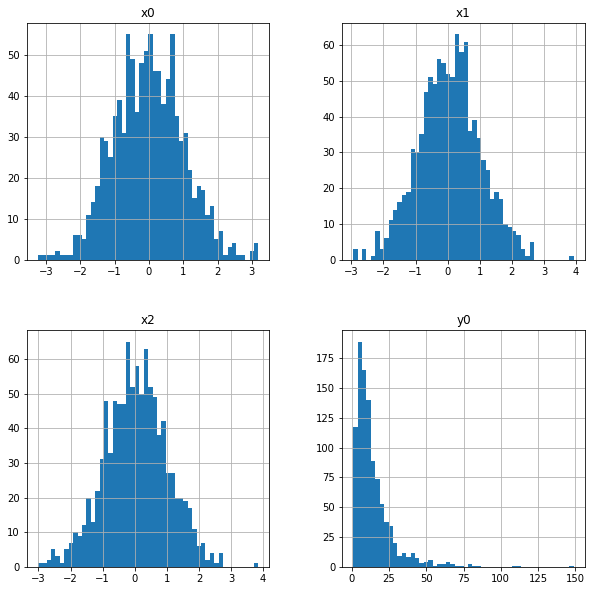

In [8]:
df.hist(bins=50, figsize=(10,10));

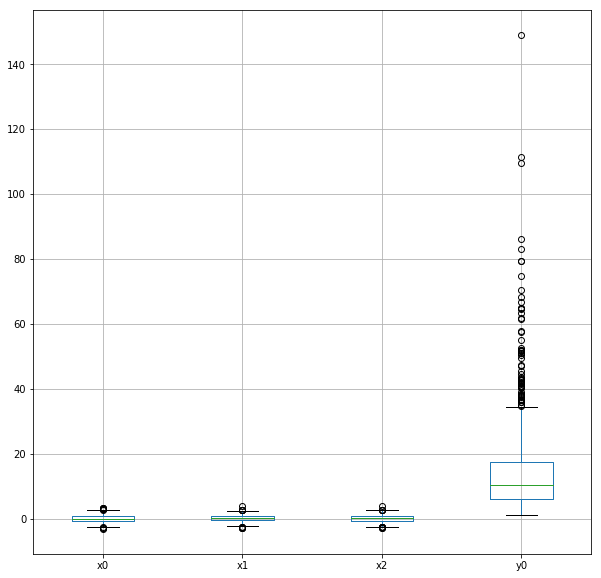

In [9]:
df.boxplot(figsize=(10,10));

- Three features, one target
- x0, x2 are bimodal, x1 is gaussian
- y0 is gaussian

# 1.1. Visualise features

In [10]:
#g = sns.PairGrid(df, hue='y0_bin')
#g.map(plt.scatter)
#g.map_lower(sns.kdeplot);

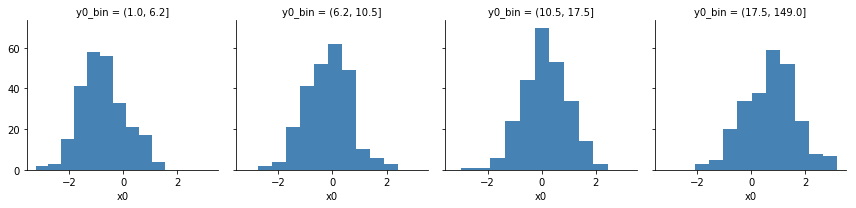

In [11]:
g = sns.FacetGrid(df, col="y0_bin", margin_titles=True)
g.map(plt.hist, "x0", color="steelblue");

- x0 is gaussian in y0, different means for each y0
- x1 is gaussian in y0, same means
- x2 is bimodal in y0 = 0, gaussian in y0 = 1

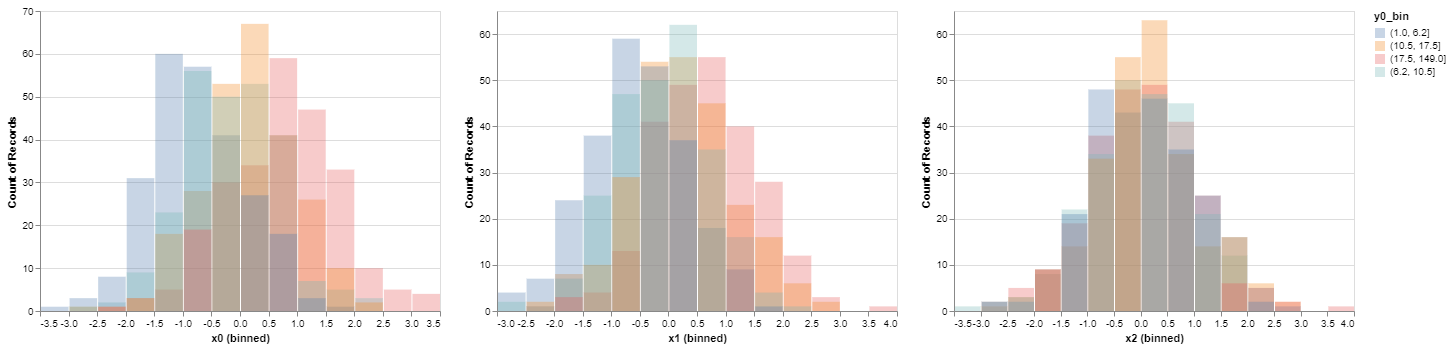

In [12]:
chart = AltChart(data=df, size=(1, 3)).histogram(
    meta='Histogram with color',
    x='x0', pos=(0, 0), interactive=False, bins=30,
    color='y0_bin:N', stack=False, fill=True, alpha=0.3,
).histogram(
    meta='Histogram with color',
    x='x1', pos=(0, 1), interactive=False, bins=30,
    color='y0_bin:N', stack=False, fill=True, alpha=0.3,
).histogram(
    meta='Histogram with color',
    x='x2', pos=(0, 2), interactive=False, bins=30,
    color='y0_bin:N', stack=False, fill=True, alpha=0.3,
)
chart.display();

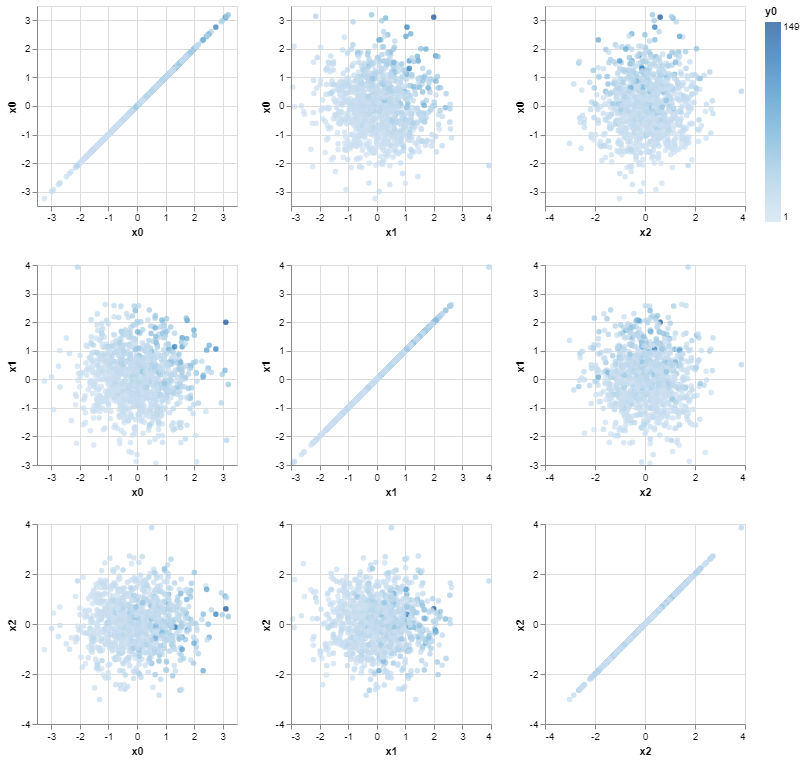

In [13]:
chart = AltChart(data=df, size=(1, 1)).facet(rows=['x0', 'x1', 'x2'], columns=['x0', 'x1', 'x2'], color='y0', width=200, height=200, pos=(0, 0))
chart.display()

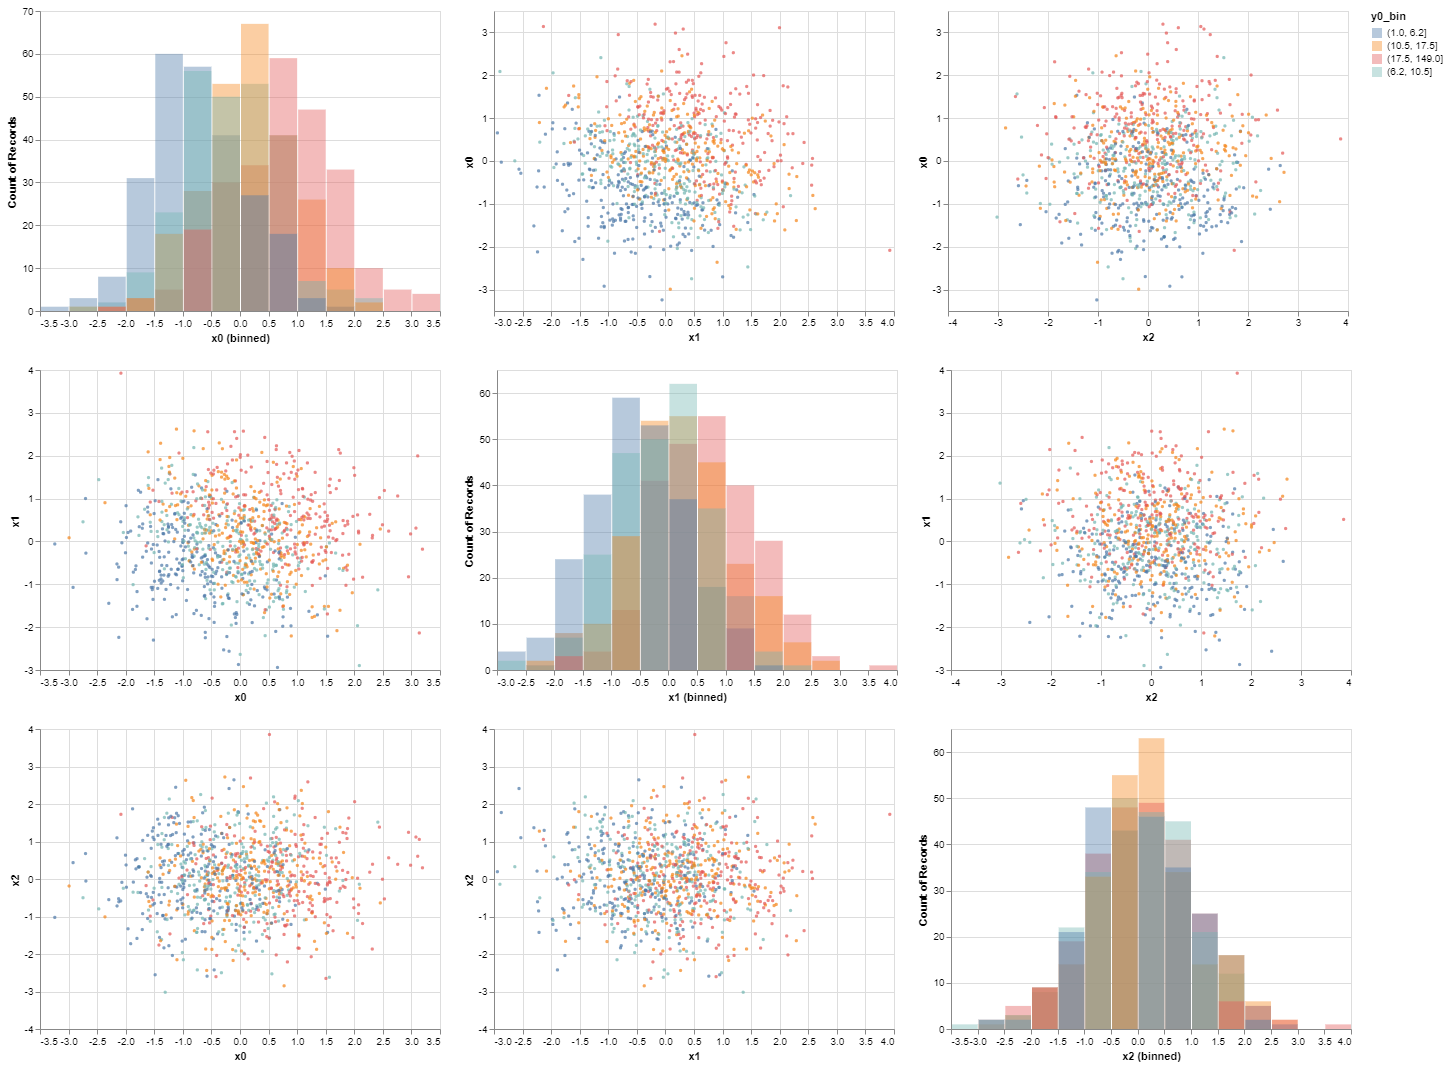

In [14]:
selection_1 = alt.selection(type='interval', resolve='global')
chart = AltChart(data=df, size=(1, 1)
                ).pairgrid(
    meta='Variable explore',
    variables=['x0', 'x1', 'x2'], 
    color='y0_bin', stack=False, alpha=0.4,
    #brush=selection_1,  # Enables you to draw on the chart
    #selection=selection_1,
    width=50, height=50, pos=(0, 0))
chart.display()

## 1.2 Correlations

In [15]:
corr_matrix = df.corr()
corr_matrix["y0"].sort_values(ascending=False)

y0    1.000000
x0    0.513722
x1    0.406329
x2   -0.003108
Name: y0, dtype: float64

- x1 and x2 have the strongest correlations with y0, x0 is weaker.

## 1.2 Summary

__One target:__
- __y0__ - Exponential decay

__Three features:__
- __x0__ - Bimodal, strongly correlated with _y0_. Gaussian in _y0_, different means for each _y0_.
- __x1__ - Gaussian, strongly correlated with _y0_. Gaussian in _y0_, same means for each _y0_.
- __x2__ - Bimodal, strongly correlated with _y0_. Bimodal in _y0 = 0_, gaussian in _y0 = 1_.

# 2 Data transform

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
n_jobs = 1
std_scale_tr = ColumnTransformer([
    ('standard_scaler', StandardScaler(), ['x0', 'x1', 'x2'])
    ], n_jobs=n_jobs, remainder='drop')
std_scale_tr.fit_transform(df)

array([[ 0.63462657,  0.26276433,  0.37408584],
       [ 0.08709541,  0.8079384 , -0.1487309 ],
       [ 3.0909556 ,  2.00123984,  0.57082095],
       ...,
       [-0.03331786,  1.0293018 ,  0.6470758 ],
       [ 0.20547089, -0.53585007,  0.24099641],
       [-1.11564801, -0.83868247,  0.58712496]])

# 3 Training

- Training on training set using CV to evaluate performance.
- Learning curves

### Data preparation
- To avoid sampling bias, if there is some representative distribution the sampling should be strafied in that distribution.
- `Train`: Only sample used to fit the model.
- `Validation`: Sample used to evaluate model fit for tuning model hyperparameters and model selection. The model is not fit on this set.
- `Test`: Sample used to estimate the generalisation error. Only used when the model is fully trained. Typically selected to be representative of the global population.

In the following:
- `X_train` = Training set.
- `X_val` = Validation set.
- `X_cv_train` = Training + Validation set. Can be fed into CV algorithms.
- `X_test` = Test set.

In [18]:
from sklearn.model_selection import train_test_split
X = df[['x0', 'x1', 'x2']]
y = df['y0']

# Train = 80%, Test = 20% (if using CV)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Train = 60%, Val = 20%, Test = 20%
X_cv_train, X_test, y_cv_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val   = train_test_split(X_cv_train, y_cv_train, test_size=0.25, random_state=random_state)

- Data should be scaled using the training set, with the same scaling applied to the test set.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Feature engineering
- Discretize continous features
- Add transformation of features
- Dimensionality reduction - Combine correlated variables into a new feature, runs faster useless less memory
- Feature scaling


In [20]:
from sklearn import pipeline
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [21]:
def pipeline_model(scaler, model):
    pipeline_model = pipeline.Pipeline([('scal', scaler), ('model', model)])
    return pipeline_model

### LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

# Transform the targets as part of the workflow
# https://scikit-learn.org/dev/modules/compose.html#transforming-target-in-regression
transformer = preprocessing.StandardScaler()
regressor = LinearRegression() # Regressor can be a Pipeline
# Normally use this transform
# regr = TransformedTargetRegressor(regressor=regressor,
#                                   transformer=preprocessing.StandardScaler())
# Use this as we have an exponetial distribution
regr = TransformedTargetRegressor(regressor=regressor,
                                        func=np.log1p,
                                        inverse_func=np.expm1)

model = regr
model.fit(X_train, y_train)
model.regressor_.intercept_, model.regressor_.coef_ # You need to get the regressor parameters through the regressor_ method

(2.4593807007121224, array([ 0.42364656,  0.34429836, -0.01021381]))

In [23]:
model.regressor_.coef_

array([ 0.42364656,  0.34429836, -0.01021381])

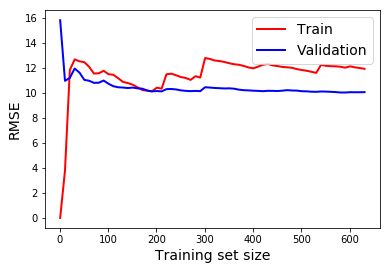

In [29]:
# Using only one feature
from catana.plotting.metrics import plot_learning_curves
ca.plotting.metrics.plot_learning_curves(model, X_cv_train.values[:,:1], y_cv_train, step=10)

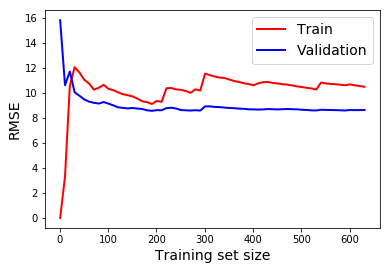

In [32]:
# Using all features
ca.plotting.metrics.plot_learning_curves(model, X_cv_train.values, y_cv_train, step=10)

- Plateau at high RMSE $\rightarrow$ underfitting

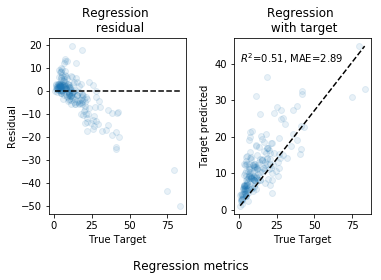

In [35]:
# Measure the fit residual and correlation using the validation set
ca.plotting.metrics.plot_fit_residual(model, X_train, y_train, X_val, y_val)

In [36]:
ca.plotting.metrics.model_cv(model, X_cv_train, y_cv_train)

MAE = 5.570 ± 0.572


## RidgeRegression with CV
- $l_{2}$ regularisation term

C:\Users\Mark\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:957: RuntimeWarning: invalid value encountered in true_divide
  return (c / G_diag) ** 2, c


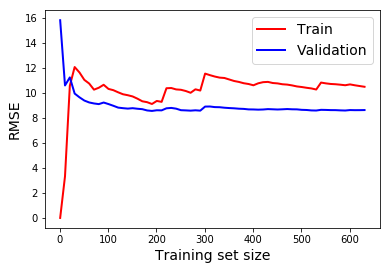

In [37]:
from sklearn.linear_model import RidgeCV
# Alpha is an additional hyperparameter to optimise
# Example of an underfitting RidgeRegression (alpha = 1)
ridge_reg = RidgeCV(alphas=[1])
ridge_reg.fit(X_train, y_train)
# Using all two features
ca.plotting.metrics.plot_learning_curves(ridge_reg, X_cv_train[['x0', 'x1', 'x2']], y_cv_train, step=10)

C:\Users\Mark\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:957: RuntimeWarning: invalid value encountered in true_divide
  return (c / G_diag) ** 2, c


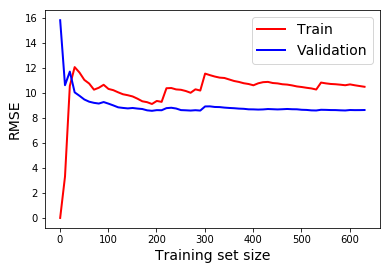

In [38]:
# Example of a better fitting RidgeRegression (alpha = 0.01)
ridge_reg = RidgeCV(alphas=[0.01, 0.001, 0.0001])
ridge_reg.fit(X_train, y_train)
# Using all two features
ca.plotting.metrics.plot_learning_curves(ridge_reg, X_cv_train[['x0', 'x1', 'x2']], y_cv_train, step=10)

In [39]:
ridge_reg.coef_

array([7.40586689, 6.13203845, 0.22272934])

## LassoRegression
- $l_{1}$ regularisation term
- An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the
least important features.

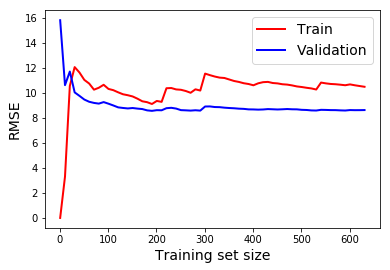

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X, y)
ca.plotting.metrics.plot_learning_curves(lasso_reg, X_cv_train[['x0', 'x1', 'x2']], y_cv_train, step=10)

In [41]:
# We can see that lasso finds that the first variable has no 
# importance in the fit
lasso_reg.coef_

array([7.39614959, 6.11979204, 0.21182946])

## SGD LassoRegression
- Stochastic Gradient Descent should be used when the number of features and samples gets too big (10,000) otherwise use `Ridge`, `Lasso` or `ElasticNet`.
- Requires a stopping criteria
- Use the following penalties to replicate the above models: `None` - LinearRegression (Not recommended), `l1` Lasso, `l2` Ridge.
- https://scikit-learn.org/stable/modules/sgd.html

In [42]:
from sklearn.linear_model import SGDRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty='l2',
                       eta0=0.0005,
                       alpha=0.01,
                       warm_start=True,
                       learning_rate="invscaling",
                       random_state=42)

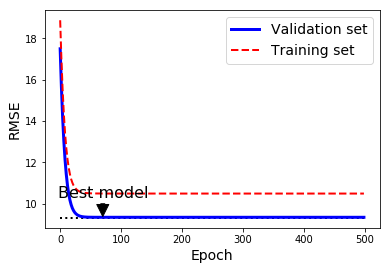

In [43]:
from sklearn.metrics import mean_squared_error

n_epochs = 500
train_errors, val_errors, model_coefs = [], [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    model_coefs.append(sgd_reg.coef_)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse * 1.1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## SVR

In [46]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
model_pred = svm_reg.predict(X_val)
svm_mse = mean_squared_error(model_pred, y_val)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

9.801247222594784

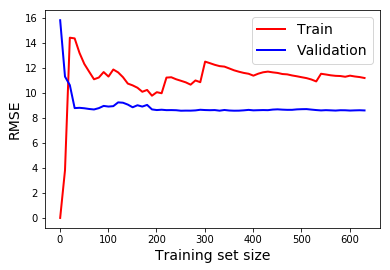

In [57]:
ca.plotting.metrics.plot_learning_curves(svm_reg, X_cv_train[['x0', 'x1', 'x2']], y_cv_train, step=10)

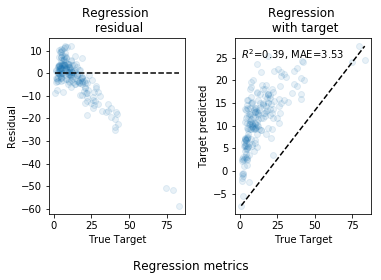

In [49]:
# Measure the fit residual and correlation using the validation set
ca.plotting.metrics.plot_fit_residual(svm_reg, X_train, y_train, X_val, y_val)

In [55]:
#SVM regression using a 2nd-degree polynomial kernel
# C = Regularisation parameter
svm_poly_reg = SVR(kernel="poly", degree=4, C=10, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
model_pred = svm_poly_reg.predict(X_val)
svm_mse = mean_squared_error(model_pred, y_val)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

15.433866198129314

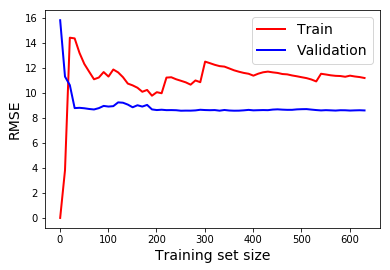

In [59]:
ca.plotting.metrics.plot_learning_curves(svm_reg, X_cv_train[['x0', 'x1', 'x2']], y_cv_train, step=10)

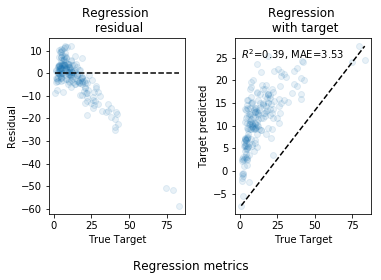

In [56]:
# Measure the fit residual and correlation using the validation set
ca.plotting.metrics.plot_fit_residual(svm_reg, X_train, y_train, X_val, y_val)

# 4 Benchmarking

- RMSE is the preferred performance measure for regression. Alternatively, MSE gives the same result with less processing.
- MAE is better for data with outliers.

In [48]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_cv_train, y_cv_train,
                            scoring="neg_mean_squared_error", cv=100)
model_rmse_cv_scores = np.sqrt(-cv_scores)
'RMSE = {:.2E} ± {:.2E}'.format(model_rmse_cv_scores.mean(), model_rmse_cv_scores.std())

'RMSE = 8.00E+00 ± 4.73E+00'

In [ ]:
plt.hist(model_rmse_cv_scores, bins=30)
plt.xlabel('Model CV RMSE');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X, y)

model_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, model_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# 5 Fine tuning using CV

- Optimisation of hyperparameters - try powers of 10 of parameters
- Regularisation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

# from sklearn.model_selection import GridSearchCV
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
# scoring='neg_mean_squared_error')
# grid_search.fit(housing_prepared, housing_labels)
#
# grid_search.best_params_
# grid_search.best_estimator_